In [1]:
from IPython.display import HTML
css_file = './custom.css'
HTML(open(css_file, "r").read())

# Clustering - K-Means

© 2018 Daniel Voigt Godoy

## 1. Definition

K-Means an ***unsupervided learning*** algorithm, meaning, it does not depend on ***labels***.

It is used to iteratively ***cluster*** instances into ***k*** distinct groups. The number of clusters ***k*** must be provided.

### 1.1 Algorithm

It starts with ***k*** initial ***centroids*** - randomly select data points, for instance - and then:
1. computes ***distances*** of each point to ***all centroids*** and assigns each point to the ***centroid*** corresponding to the ***shortest distance***
2. ***recomputing*** the centroid coordinates using the ***mean of all points assigned to it***

The process is repeated until ***no reassignment*** happens anymore, or the maximum number of iterations is reached (like 100).

### 1.2 Centroids' Initialization

One of the caveats of ***K-means*** algorithm is the fact that it is resulting clustering is ***dependent on initialization***. If you randomly initialize the centroids and apply K-means multiple times, it is very likely you'll end up with slightly different clusters every time.

One way of mitigating this issue is to perform ***several random initializations*** and then choose the one that minimizes better the inertia. There are also other ***initialization methods***, but this is out of our scope now.

### 1.3 Loss

Effectively, the algorithm is ***minimizing*** the ***within-cluster squared sum of errors (SSE)*** or ***inertia***, computing it for each cluste using its points and the corresponding mean. 

At the extremes:
- single cluster (no clustering): the same SSE as the full dataset
- k = m (every point is its own cluster): the within-cluster SSE is ***zero***, as each point equals its cluster mean

In between, the sum of all cluster's SSE is going to ***decrease towards zero*** as ***k approaches m***.

### 1.4 Choosing k

There are some possibilities for choosing the number of clusters ***k***:
- if you know beforehand into how many groups your data should be clustered, this is your ***k***
- if you don't know it, you can use the ***elbow*** rule (the same principle used in ***PCA***) for the ***total sum of SSE***

Sometimes the elbow rule suggests a number of clusters which may not make the most sense for your data - then you can use a ***lesser*** number of clusters to better explain your data.

## 2. Experiment

Time to try it yourself!

There are 35 points in two dimensions without any labels.

The left plot shows the data points with ***k*** centroids marked as ***colored crosses***.

The right plot shows the ***within SSE*** (or inertia) for ***each*** cluster. The title shows the ***total sum of SSE***. The initial value, when all points are ***gray*** is the ***SSE of the full dataset***.

The sliders below allow you to:
- perform each iterative step
    - odd steps perform the ***recomputation of centroids*** 
    - even steps perform the ***assignment of points to a cluster***
- change the number of clusters (***k***)
    - every time you change k, it will ***randomly initialize*** the centroids - so you can restart the centroids sliding it back and forth

Use the sliders to play with different configurations and answer the ***questions*** below.

In [2]:
from intuitiveml.unsupervised.KMeans import *
X, y = data()
n_centroids = 3

In [3]:
myk = plotKMeans(X, y, n_centroids)
vb = VBox(build_figure(myk), layout={'align_items': 'center'})

C:\Users\DAnand\anaconda3\envs\fund\lib\site-packages\plotly\tools.py:464: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [4]:
vb

    'data': [{'marker': {'color': 'black', 'line': {'color': 'black', 'width': 2…

#### Questions

1. Starting with ***2 clusters***, go ***step-by-step*** through the iterations:
    - what happens to the ***total sum of SSE*** as you move through the iterations?
    - how many iterations till you see ***no change***?
    
    
2. Slide the number of clusters to some other number and ***back to 2*** (reinitializing centroids), set ***iteration to 1*** and repeat the steps from previous question:
    - the initial iterations should be quite different - what about the final clustering?
    
    
3. Set ***number of clusters to 3*** and ***iteration to 1*** and repeat the steps from first question:
    - how the ***total sum of SSE*** compare between 2 and 3 clusters at the end?


4. ***Reinitialize centroids*** for ***3 clusters***:
    - did the final clustering change after reinitializing?


5. Set ***iterations to 20*** and ***clusters to 1***:
    - as you increase the number of clusters, what happens to the ***total sum of SSE***? Why?

## 3. Scikit-Learn

[Clustering](https://scikit-learn.org/stable/modules/clustering.html)

## 4. More Resources

[Iterative Initial Centroid Search via Sampling for k-Means Clustering](https://towardsdatascience.com/iterative-initial-centroid-search-via-sampling-for-k-means-clustering-2b505119ae37)

[Unsupervised Learning with Python](https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03)

[An Introduction to Clustering and different methods of clustering](https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/)

[Extensions to the k-Means Algorithm for Clustering Large Data Sets with Categorical Values](http://www.cs.ust.hk/~qyang/Teaching/537/Papers/huang98extensions.pdf)

#### This material is copyright Daniel Voigt Godoy and made available under the Creative Commons Attribution (CC-BY) license ([link](https://creativecommons.org/licenses/by/4.0/)). 

#### Code is also made available under the MIT License ([link](https://opensource.org/licenses/MIT)).

In [5]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [8]:
import pandas as pd

In [106]:
data = pd.read_csv('./data/glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [108]:
from sklearn.cluster import KMeans

C:\Users\DAnand\anaconda3\envs\fund\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



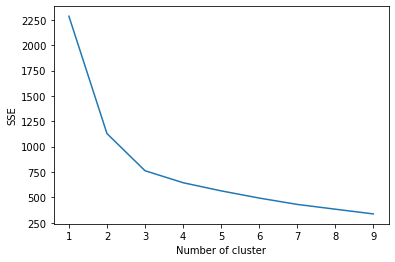

In [109]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [119]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
y_kmeans = kmeans.fit_predict(x)
 
print(label)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 4 0 2 2 2 3 2 2 4 4 2 0 2 0 0 0 0 3 3 2 2 3
 4 4 1 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [105]:
from sklearn.metrics import f1_scoreb
f1_score(y_true, y_pred

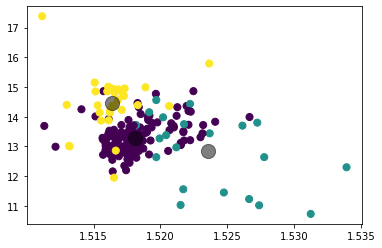

In [93]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)b


In [102]:
i

array([ 23, 155, 207])

#  Exercise

In [132]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score


In [133]:
data = pd.read_csv('./data/glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [134]:
x = data.drop("Type", axis=1)
y = data.Type

In [135]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [171]:
neigh = KNeighborsClassifier(n_neighbors=1, p=2) #, algorithm=)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
print('F1 is: ', f1_score(y_test, y_pred, average='micro'))

F1 is:  0.8372093023255814


In [172]:
# y_test

In [181]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
# lr.score(x_train, y_train)
y_pred_lr= lr.predict(x_test)
print('F1 for lc is: ', f1_score(y_test, y_pred_lr, average='micro'))

F1 for lc is:  0.7209302325581395


C:\Users\DAnand\anaconda3\envs\fund\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



F1 is:  0.8604651162790697
